# **Brooklyn Pizza Visualizations**

Joseph Lardie

December 2023

# **Imports**

In [1]:
#Numpy
import numpy as np

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

# Wordcloud
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords

#Geospacial
import geopandas as gpd
import folium

#Sklearn preprocessing
from sklearn import set_config
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
#Scipy
from scipy import stats
from scipy.stats import norm

# Warnings
import warnings
warnings.filterwarnings("ignore")
set_config(display = 'diagram')

# **Loading Yelp Data**

In [2]:
# Loading YELP Review Data
ydf = pd.read_csv('ydf')

In [3]:
# Glance of YELP Data
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alias         847 non-null    object 
 1   name          847 non-null    object 
 2   image_url     847 non-null    object 
 3   url           847 non-null    object 
 4   review_count  847 non-null    int64  
 5   categories    847 non-null    object 
 6   rating        847 non-null    float64
 7   coordinates   847 non-null    object 
 8   transactions  847 non-null    object 
 9   location      847 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.3+ KB


In [4]:
# Taking a peak at the YELP dataset
ydf.head()

,alias,name,image_url,url,review_count,categories,rating,coordinates,transactions,location
0,joes-pizza-brooklyn-8,Joe's Pizza,https://s3-media3.fl.yelpcdn.com/bphoto/0WEXB_...,https://www.yelp.com/biz/joes-pizza-brooklyn-8...,459,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 40.7168952, 'longitude': -73.9589...","['pickup', 'delivery']","{'address1': '216 Bedford Ave', 'address2': ''..."
1,carmines-pizzeria-brooklyn,Carmine's Pizzeria,https://s3-media4.fl.yelpcdn.com/bphoto/V6LFN2...,https://www.yelp.com/biz/carmines-pizzeria-bro...,538,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 40.714987, 'longitude': -73.94414}","['pickup', 'delivery']","{'address1': '358 Graham Ave', 'address2': '',..."
2,rome-to-brooklyn-pizza-brooklyn-2,Rome To Brooklyn Pizza,https://s3-media1.fl.yelpcdn.com/bphoto/4JavGL...,https://www.yelp.com/biz/rome-to-brooklyn-pizz...,166,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",5.0,"{'latitude': 40.711886016839244, 'longitude': ...","['pickup', 'delivery']","{'address1': '755 Grand St', 'address2': None,..."
3,paulie-gees-brooklyn,Paulie Gee's,https://s3-media4.fl.yelpcdn.com/bphoto/RCrEpY...,https://www.yelp.com/biz/paulie-gees-brooklyn?...,1364,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.5,"{'latitude': 40.729546, 'longitude': -73.958568}",['delivery'],"{'address1': '60 Greenpoint Ave', 'address2': ..."
4,prince-street-pizza-new-york-2,Prince Street Pizza,https://s3-media4.fl.yelpcdn.com/bphoto/PfI8oV...,https://www.yelp.com/biz/prince-street-pizza-n...,5091,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 40.72308755605564, 'longitude': -...","['pickup', 'delivery']","{'address1': '27 Prince St', 'address2': None,..."


# **Data Cleaning**

In [5]:
# Dropping irrelevant columns
ydf.drop(['image_url', 'url'], axis=1, inplace=True)

# **Visualizations For YELP Data**

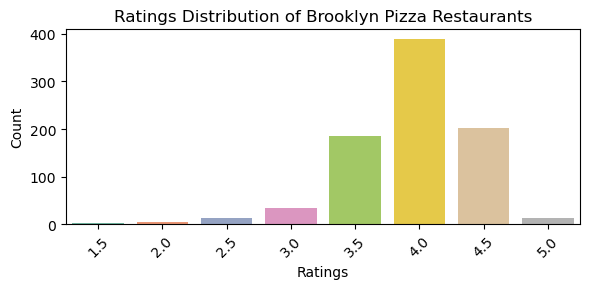

In [6]:
# Visualizing Ratings Distribution of Pizza Restaurants in Brooklyn
plt.figure(figsize=(6, 3))
sns.countplot(data=ydf, x='rating', palette='Set2') 
plt.title('Ratings Distribution of Brooklyn Pizza Restaurants')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

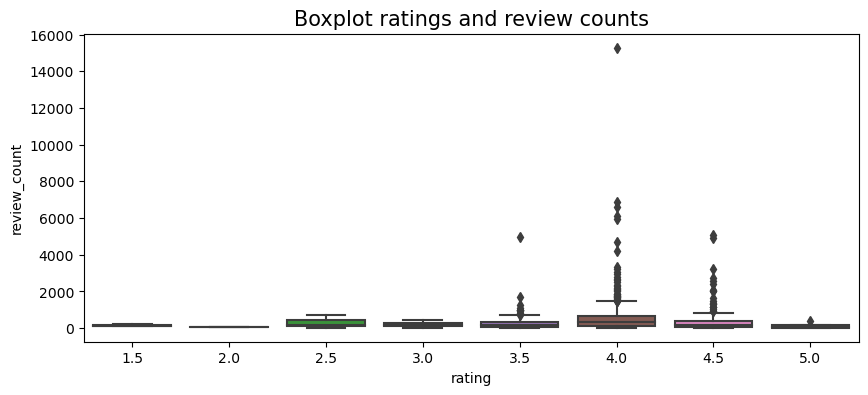

In [7]:
# Create a boxplot using Seaborn
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.boxplot(x='rating', y='review_count', data=ydf)
plt.title('Boxplot ratings and review counts', fontsize=15)

# Show the plot
plt.show()

# **Loading Merged Data**

In [8]:
# Loading Merged Dataset that includes Restaurant inspections data and YELP data together
mdf = pd.read_csv('mdf')

In [9]:
# Ensuring the merged dataset was loaded correctly
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  506 non-null    int64  
 1   DBA                    506 non-null    object 
 2   BORO                   506 non-null    object 
 3   BUILDING               506 non-null    object 
 4   STREET                 506 non-null    object 
 5   ZIPCODE                502 non-null    float64
 6   CUISINE DESCRIPTION    506 non-null    object 
 7   INSPECTION DATE        506 non-null    object 
 8   ACTION                 506 non-null    object 
 9   VIOLATION CODE         504 non-null    object 
 10  VIOLATION DESCRIPTION  504 non-null    object 
 11  CRITICAL FLAG          506 non-null    object 
 12  SCORE                  506 non-null    float64
 13  GRADE                  506 non-null    object 
 14  GRADE DATE             499 non-null    object 
 15  INSPEC

## **Extracting only the most recent inspections**

In [10]:
# Extracting only the most recent inspections
mdf['INSPECTION DATE'] = pd.to_datetime(mdf['INSPECTION DATE'])

# Sort the DataFrame by 'INSPECTION_DATE' in descending order within each group
mdf.sort_values(by=['DBA', 'INSPECTION DATE'], ascending=[True, False], inplace=True)

# Keep only the first row (most recent inspection) for each group
mdf = mdf.groupby('DBA').head(1)

# Display the resulting DataFrame
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 125 to 71
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CAMIS                  64 non-null     int64         
 1   DBA                    64 non-null     object        
 2   BORO                   64 non-null     object        
 3   BUILDING               64 non-null     object        
 4   STREET                 64 non-null     object        
 5   ZIPCODE                63 non-null     float64       
 6   CUISINE DESCRIPTION    64 non-null     object        
 7   INSPECTION DATE        64 non-null     datetime64[ns]
 8   ACTION                 64 non-null     object        
 9   VIOLATION CODE         64 non-null     object        
 10  VIOLATION DESCRIPTION  64 non-null     object        
 11  CRITICAL FLAG          64 non-null     object        
 12  SCORE                  64 non-null     float64       
 13  GRADE

# **Feature Engineering**

In [11]:
# Define size categories
size_bins = [0, 50, 200, np.inf]
size_labels = ['Small', 'Medium', 'Large']

# Create 'Size Category' column
mdf['Size Category'] = pd.cut(mdf['review_count'], bins=size_bins, labels=size_labels)

In [12]:
# Assuming 'BORO' and 'review_count' columns are available
mdf['Relative Location'] = (mdf['review_count'] > mdf.groupby('BORO')['review_count'].transform('median')).astype(int)

In [13]:
# Create a new column 'Full Address'
mdf['Full Address'] = mdf['BUILDING'] + ' ' + mdf['STREET']

In [14]:
# Create a new column 'Restaurant Chain Indicator'
mdf['Chain Indicator'] = mdf['DBA'].duplicated(keep=False)

In [15]:
# Nearest competitors
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'constant'
mdf[['Latitude', 'Longitude']] = imputer.fit_transform(mdf[['Latitude', 'Longitude']])

# Now, you can fit the NearestNeighbors model
cuisine_coords = mdf.groupby('CUISINE DESCRIPTION')[['Latitude', 'Longitude']].mean()
nbrs = NearestNeighbors(n_neighbors=1, metric='haversine').fit(cuisine_coords)

distances, indices = nbrs.kneighbors(mdf[['Latitude', 'Longitude']])
mdf['Distance to Nearest Competitor'] = distances

In [16]:
# Inspection rating
mdf['inspection_rating'] = mdf['SCORE']

# Ranking based on inspection score in ascending order (lower score is better)
mdf['inspection_rating'] = mdf['inspection_rating'].rank(ascending=True)

# Displaying the DataFrame with the new 'inspection_rating' column
print(mdf[['name', 'SCORE', 'inspection_rating']])

                          name  SCORE  inspection_rating
125  ARTICHOKE BASILLE'S PIZZA   27.0               61.5
164         BATTLE HILL TAVERN   12.0               38.0
16                  BEST PIZZA   13.0               50.0
247             BRICKLYN PIZZA   12.0               38.0
435               BROOKLYN DOP   12.0               38.0
..                         ...    ...                ...
471          UNION PIZZA WORKS   12.0               38.0
77           VINNIE'S PIZZERIA   13.0               50.0
346                    WHEATED    5.0                7.0
2           WILLIAMSBURG PIZZA   12.0               38.0
71             ZEFF'S PIZZERIA   12.0               38.0

[64 rows x 3 columns]


# **Geospatial Visualization**

## **Cleaning up the Coordinates column**

In [17]:
# Function to clean up longitude and latitude
def clean_coordinates(coord):
    try:
        # Convert to float
        coord = float(coord)
        
        # Ensure that longitude is in the range [-180, 180]
        if coord < -180 or coord > 180:
            return None  
        else:
            return coord
    except ValueError:
        return None  

# Apply the cleaning function to 'Longitude' and 'Latitude' columns
mdf['Longitude'] = mdf['Longitude'].apply(clean_coordinates)
mdf['Latitude'] = mdf['Latitude'].apply(clean_coordinates)

# Drop rows with missing or invalid coordinates
mdf = mdf.dropna(subset=['Longitude', 'Latitude'])

## **Eliminating location outliers**

In [18]:
# Function to calculate z-score for Longitude and Latitude outliers
def calculate_zscore(column):
    z_scores = (column - column.mean()) / column.std()
    return z_scores

# Calculate z-scores for 'Longitude' and 'Latitude'
z_scores_longitude = (mdf['Longitude'] - mdf['Longitude'].mean()) / mdf['Longitude'].std()
z_scores_latitude = (mdf['Latitude'] - mdf['Latitude'].mean()) / mdf['Latitude'].std()
z_threshold = 3
outliers = (np.abs(z_scores_longitude) > z_threshold) | (np.abs(z_scores_latitude) > z_threshold)

# Keep only the rows that are not outliers
mdf = mdf[~outliers]

## **Visualization**

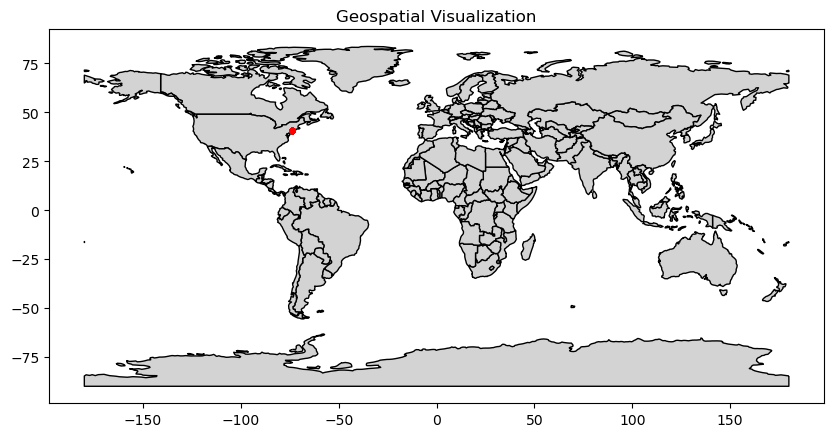

In [19]:
geometry = gpd.points_from_xy(mdf['Longitude'], mdf['Latitude'])
gdf = gpd.GeoDataFrame(mdf, geometry=geometry)

# Plot using GeoPandas and Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.5)
plt.title(f'Geospatial Visualization')
plt.show()

# Creating an interactive map using Folium for the selected borough
m = folium.Map(location=[gdf['Latitude'].mean(), gdf['Longitude'].mean()], zoom_start=10)

for index, row in gdf.iterrows():
    popup_content = (
        f"Name: {row['name']}<br>"
        f"Latitude: {row['Latitude']}, Longitude: {row['Longitude']}<br>"
        f"SCORE: {row['SCORE']}<br>"
        f"Inspection rating: {row['inspection_rating']}<br>"
        f"Full Address: {row['Full Address']}<br>"
        f"Chain Indicator: {row['Chain Indicator']}<br>"
        f"Grade: {row['GRADE']}<br>"
        f"Distance to Nearest Competitor: {row['Distance to Nearest Competitor']}<br>"
        f"Rating: {row['rating']}<br>"
        f"Review Count: {row['review_count']}<br>"
        f"Transactions: {row['transactions']}<br>"
        f"Relative Location: {row['Relative Location']}<br>"
    )

    # Create a marker with the customized popup content and add it to the map
    folium.Marker([row['Latitude'], row['Longitude']], popup=folium.Popup(popup_content, max_width=300)).add_to(m)

# Save the map to an HTML file for the selected borough
m.save(f'NY_Restaurants_map.html')

m